<a href="https://colab.research.google.com/github/LaPhanie/FLAI-DS_Course/blob/main/Aula_7__DDS4_Fundamentos_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Costs Analysis**

This porject aims to analyse medical costs information obtained from a dataset available on Kaggle.


In [ ]:
# Import usefull Libraries

import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt


In [ ]:
# Import Data Set from URL
url = 'https://raw.githubusercontent.com/LaPhanie/FLAI-DS_Course/main/insurance.csv'

# Read the CSV file
dados = pd.read_csv(url)

# Show dataset head
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# import DaatSet from google drive - after mounting Drive
adress  = '/content/drive/MyDrive/Dominando Data Science - FLAI/DataSets/health_insurance.csv'
dados = pd.read_csv(adress)
dados.head(3)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Provide descritive statistics
dados.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


## **Exploratory Data Analysis**

### **SweetViz Library**

It is imported through PIP *as sv*.
It's usefull to obtain first insights about the Data.

https://github.com/fbdesignpro/sweetviz

In [ ]:
# Install Lib
!pip install sweetviz  
# exclamation indicates that the line refers to instalation

In [ ]:
import sweetviz as sv

In [ ]:
# target_feat: target feature (variável alvo)
# create an EDA notebook
eda = sv.analyze(source = dados,target_feat = 'charges' )


                                             |          | [  0%]   00:00 -> (? left)

### **compare_intra( )**

Compara dois subconjuntos de dados.

O parâmetro **condition_series** recebe como argumento uma expressão booleana. Ex.: **condition_series = dados['sex'] == 'male'**. Repare que ao invocar a variável **sex** - armazenada em uma das series que compõem o dataframe - a função verifica se os valores armazenados são iguais à **male**. A partir desta análise, a função criará dois subconjuntos de dados: 1) para sex == male; 2) e sex != male.

O próximo argumento necessário é um objeto do tipo tupla que contenha os nomes que serão dados aos subconjuntos gerados. Ex.: **['male', 'female']**. Quando a igualdade dados['sex'] == 'male' for TRUE, o subconjunto de variáveis será nomeado como **male**; se a igualdade for FALSE, o  subconjunto de variáveis será nomeado como **female**.

Por fim, também fornecemos o argumento para o parâmetro target_value.

In [ ]:
eda2 = sv.compare_intra(source_df = dados, 
                        condition_series = dados['sex'] == 'male',
                        names = ['Masculino', 'Feminino'],
                        target_feat = 'smoker')

                                             |          | [  0%]   00:00 -> (? left)


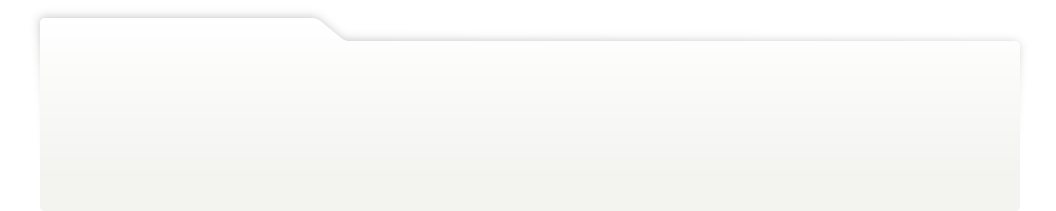
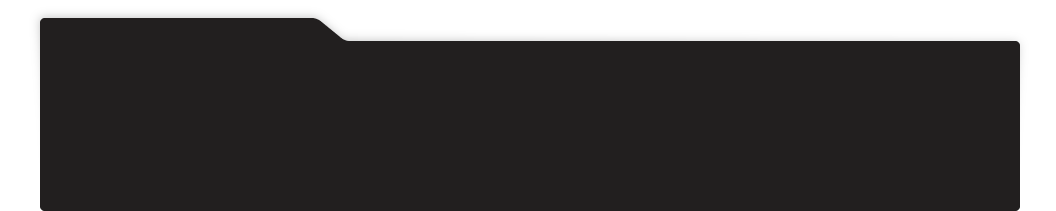
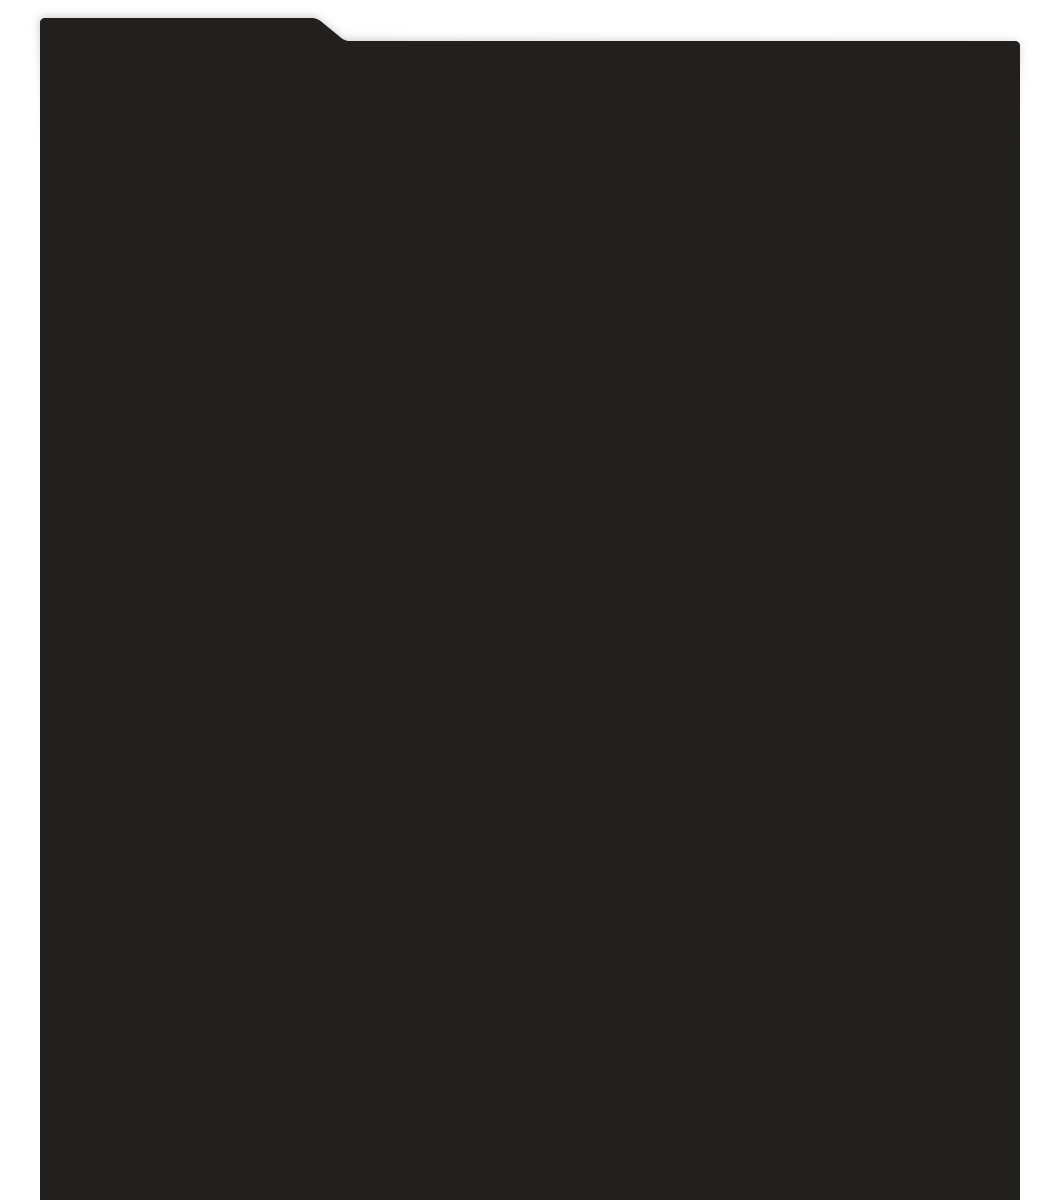
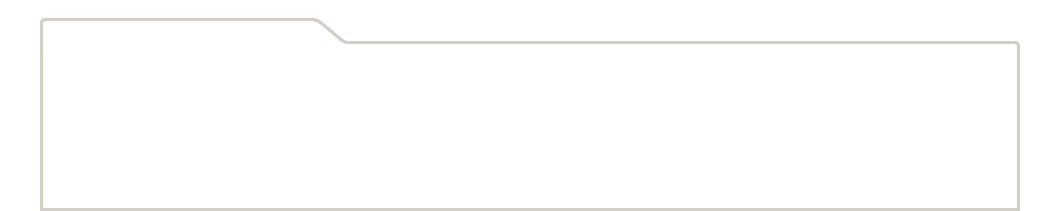
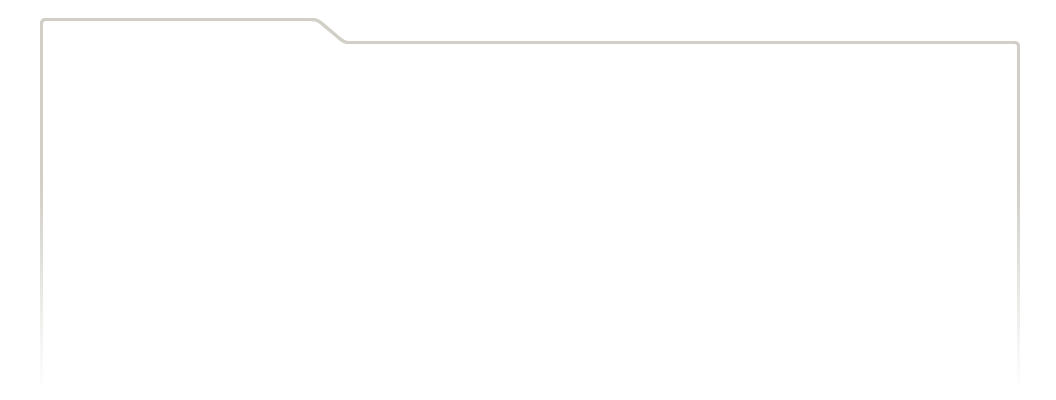
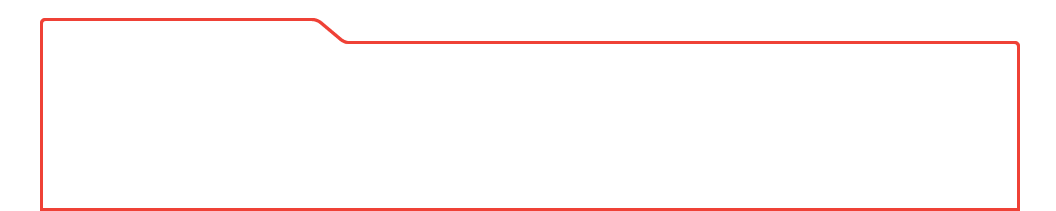
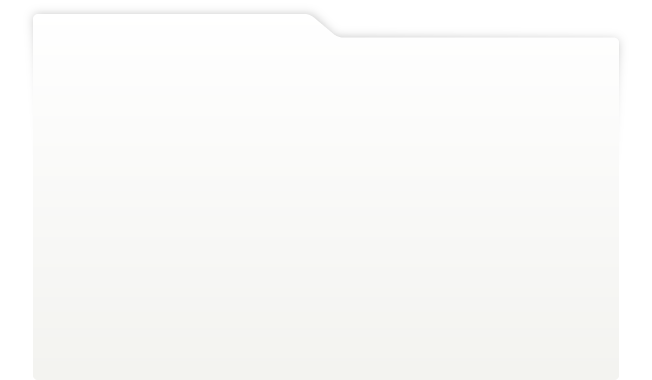
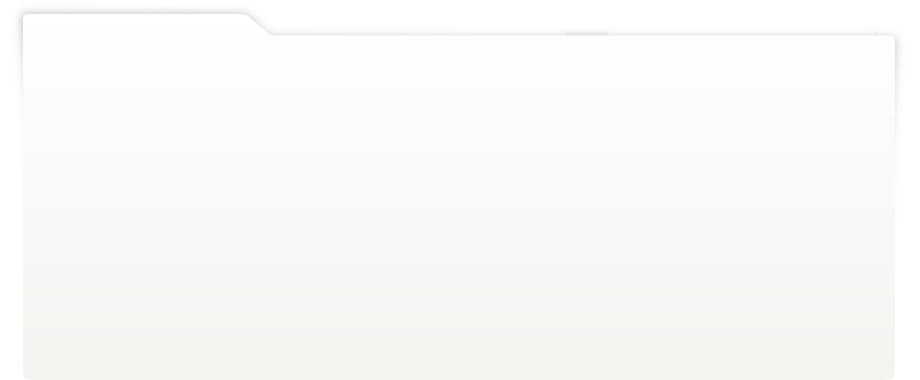
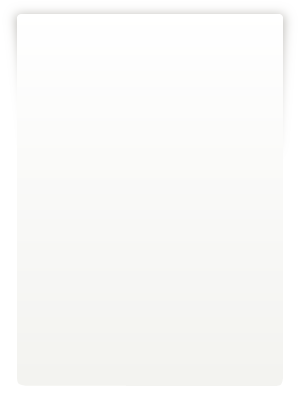
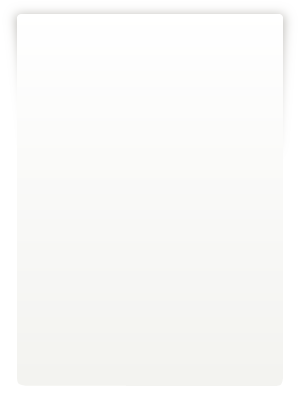
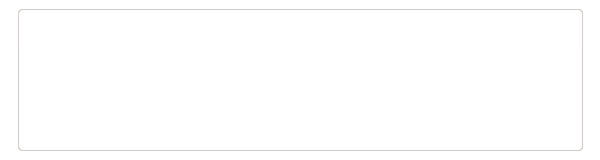
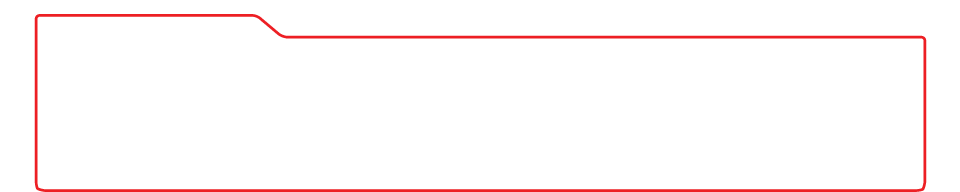
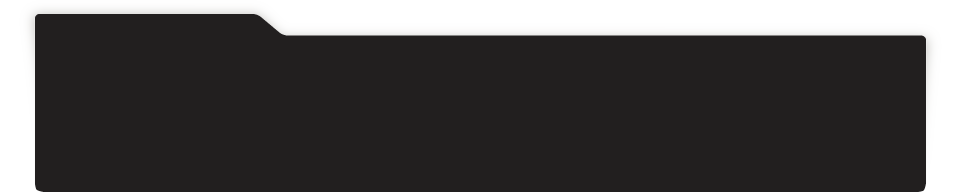
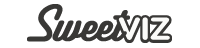
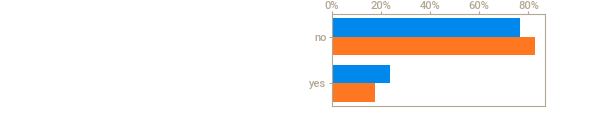
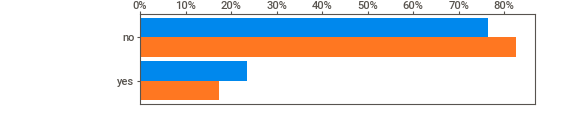
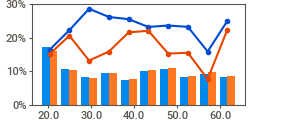
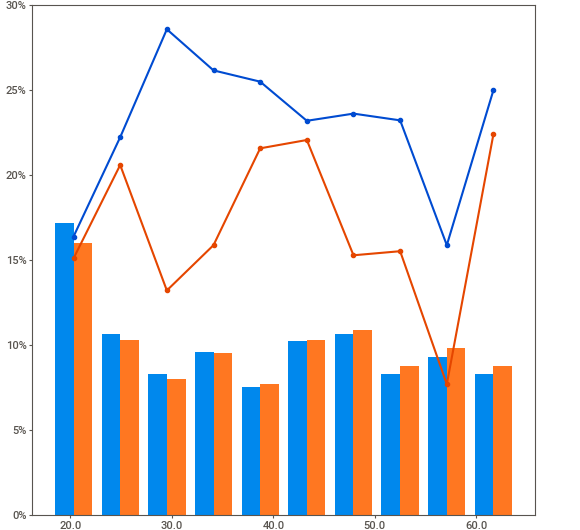
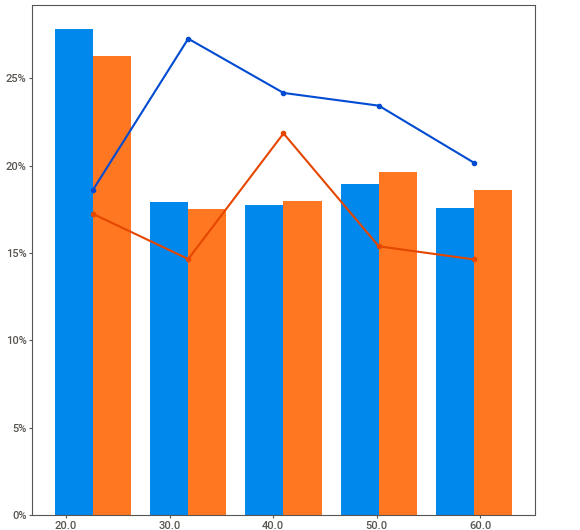
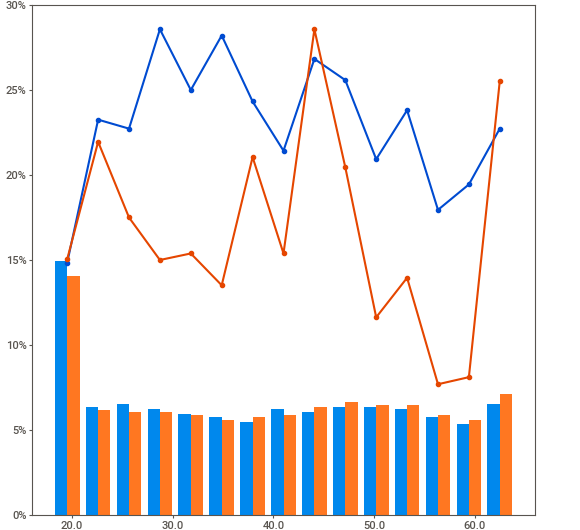
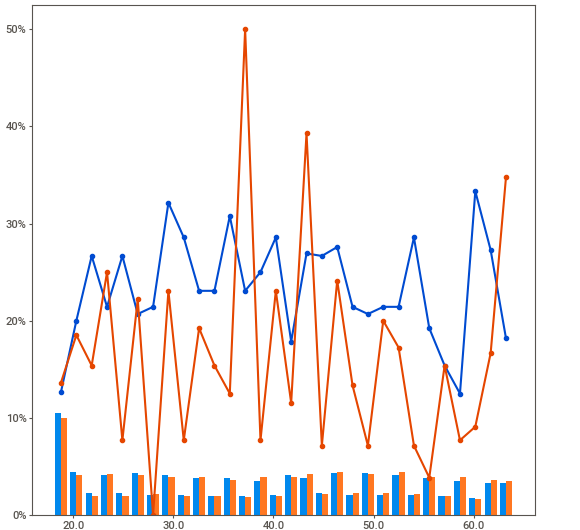
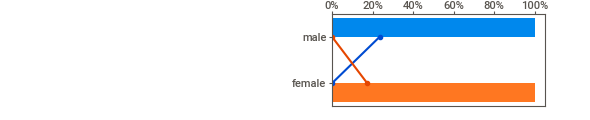
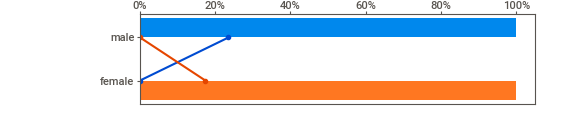
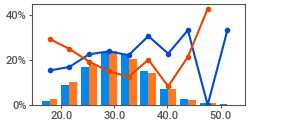
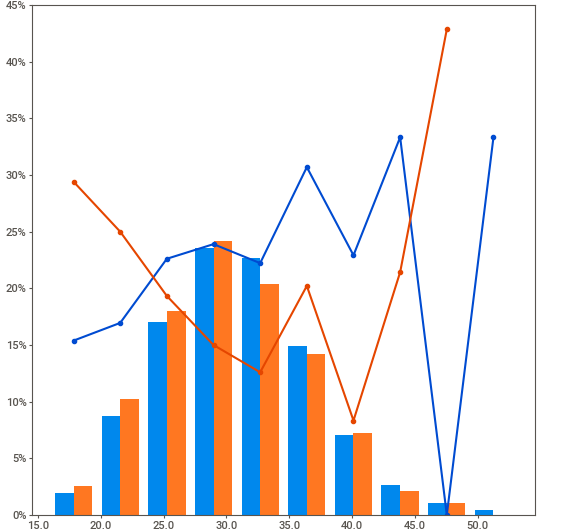
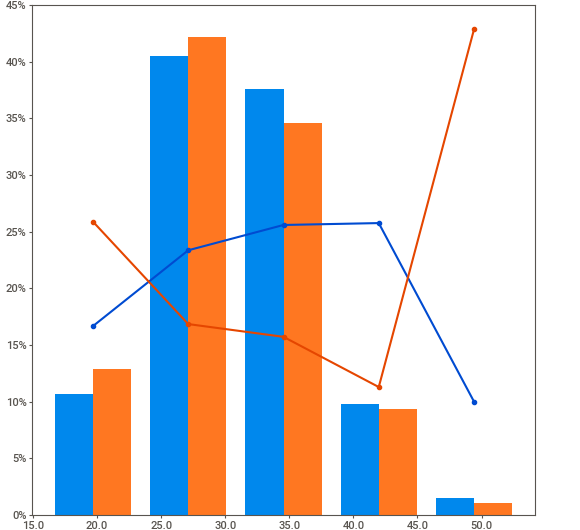
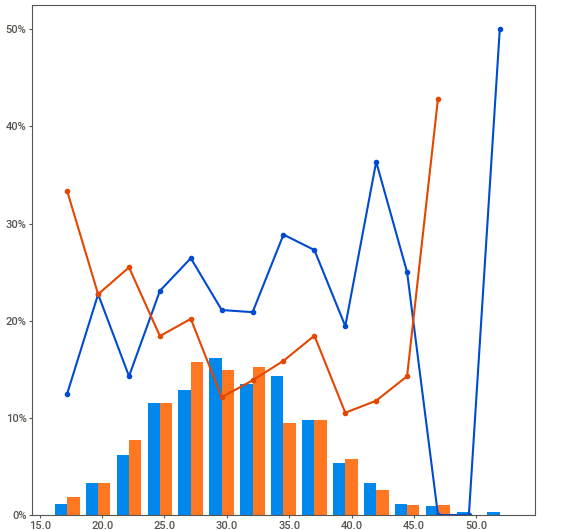
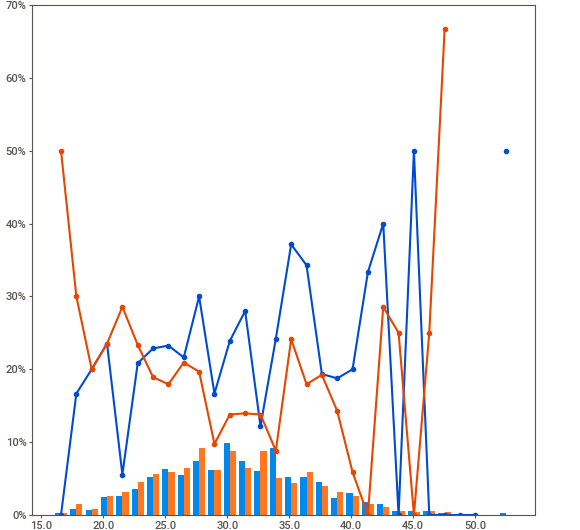
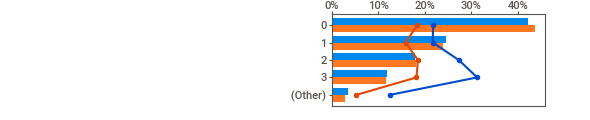
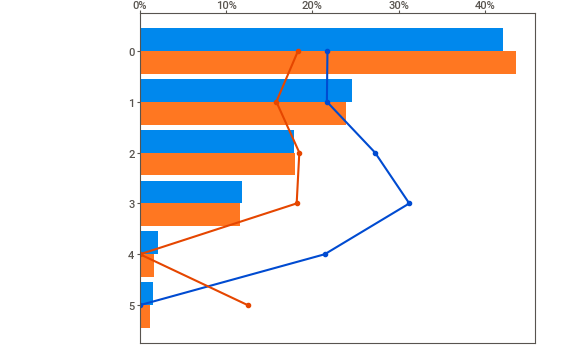
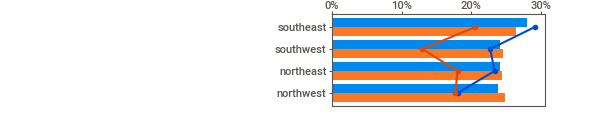
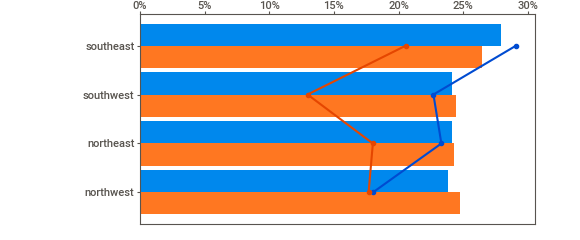
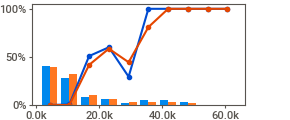
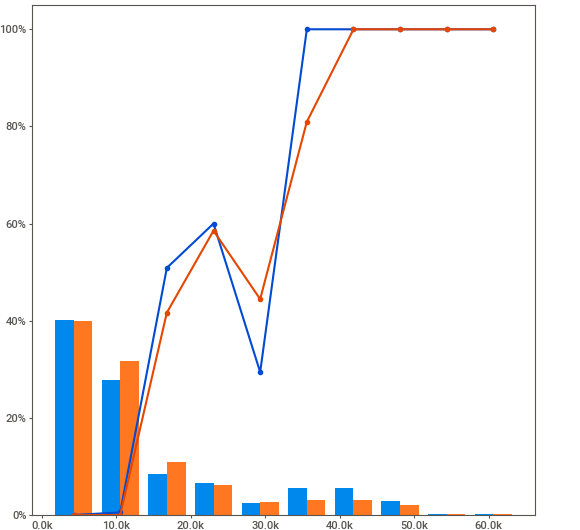
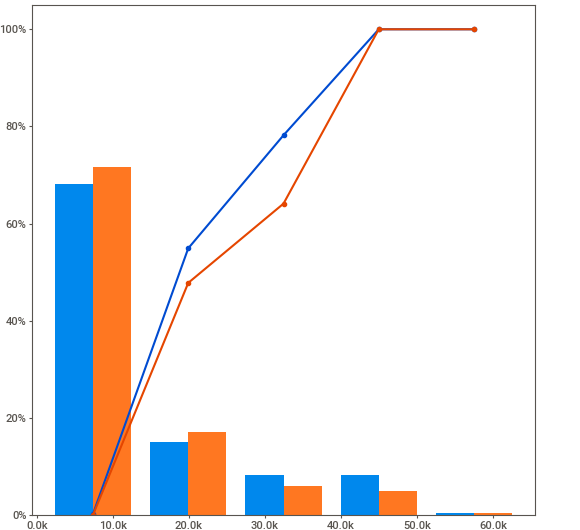
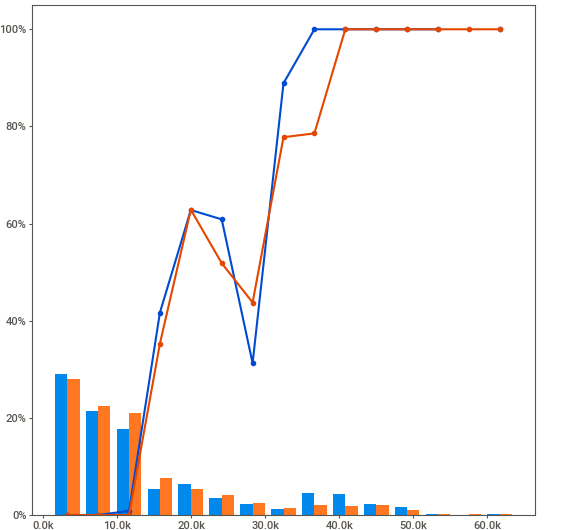
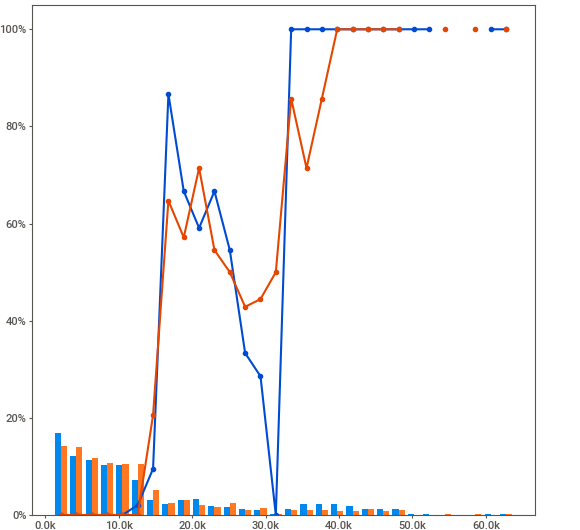
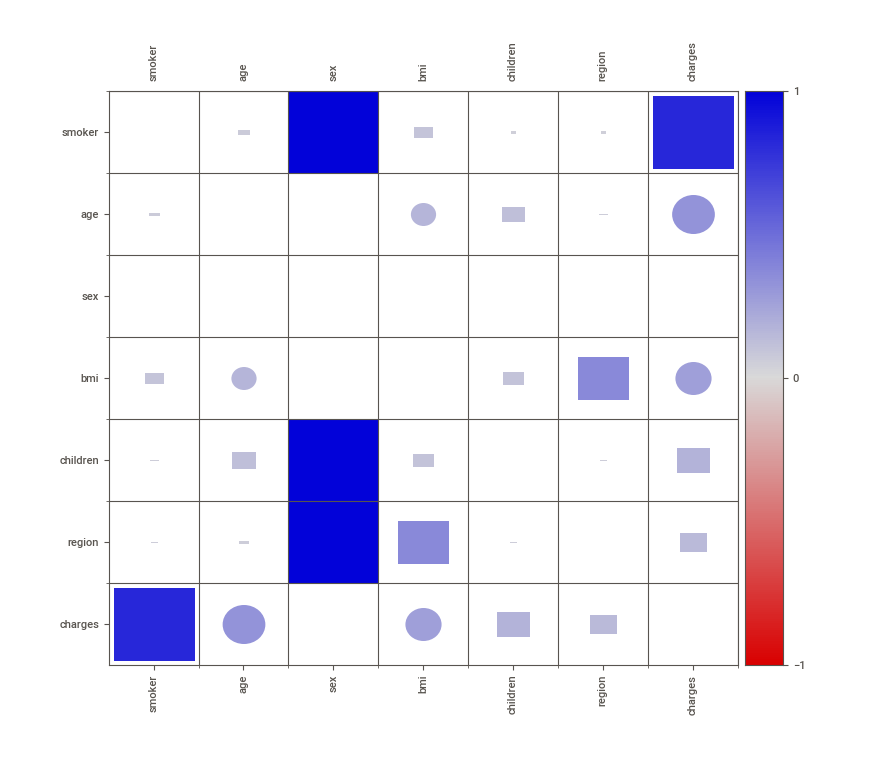
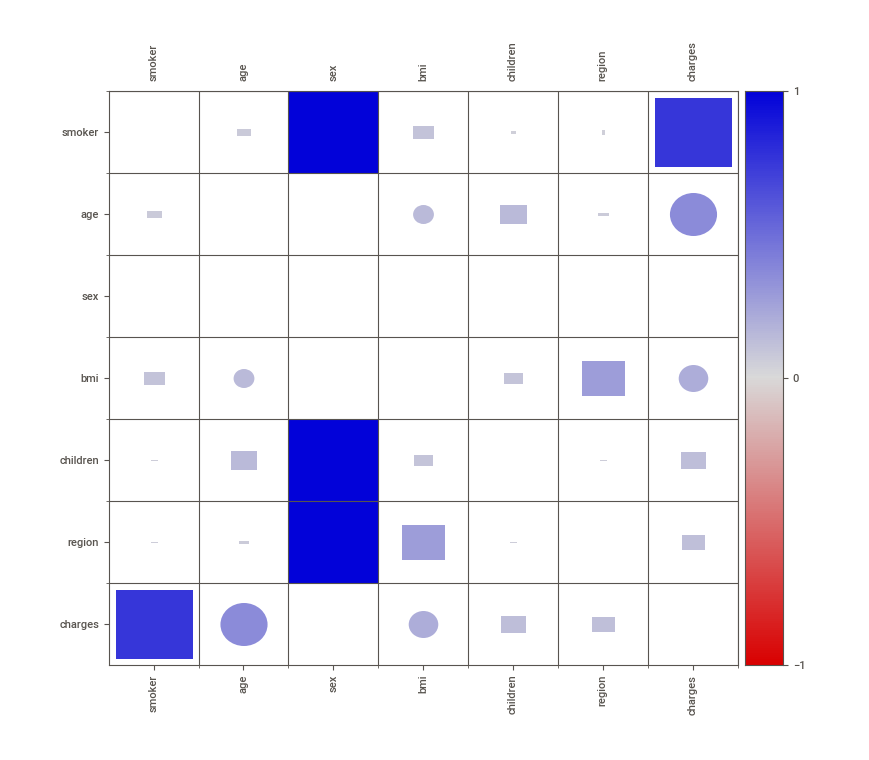

In [ ]:
eda2.show_notebook()

# *Mise en Place* para Modelagem

É um pré-processamento dos dados tornando-os adequados para o uso no desenvolvimento de modelos.

Em ML, de modo geral, todas as variáveis precisam ser numéricas.

Também é interessante que o intervalo de variabilidade das variáveis não seja tão grande e esteja próximo de zero.

Por isso, teremos que fazer as seguintes transformações em nosso conjunto de dados:

1.   Variável SMOKER: 0 para não e 1 para sim;
2.   Colocar a variável resposta numa escala para cada mil dólares.





In [ ]:
# este contador assegura que ao executar a célula abaixo mais de uma vex, as
# transformações não operem sobre si mesmas indefinidamente
i = 0 

In [ ]:
if i < 1:

  dados['smoker'] = dados['smoker'].map({'yes': 1, 'no': 0})
  dados['charges'] = dados['charges']/1000
  i = i + 1
 
dados.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16.884924
1,18,male,33.770,1,0,southeast,1.725552
2,28,male,33.000,3,0,southeast,4.449462
3,33,male,22.705,0,0,northwest,21.984471
4,32,male,28.880,0,0,northwest,3.866855


Nesta análise, vamos focar nas seguintes  variáveis: bmi, smoker, charges.

In [185]:
#  dados processados para ML
dados = dados[['bmi', 'smoker', 'charges']]
dados.head()

,bmi,smoker,charges
0,27.900,1,16.884924
1,33.770,0,1.725552
2,33.000,0,4.449462
3,22.705,0,21.984471
4,28.880,0,3.866855


**Biblioteca Seaborn**

Gera gráficos estatísticos.

É construido em cima do MatPlotlib para integrar-se co as estruturas de dados do Pandas. 

Possui funções para plotagem que operam sobre *dataframes* e *arrays*.

É orientados para Datasets.

https://seaborn.pydata.org/

In [ ]:
# importa a lib seaborn
import seaborn as sns

Plotar gráficos permite analisar possíveis relações entre variáveis.

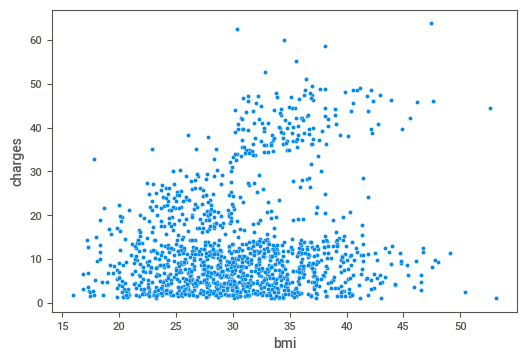

In [186]:
# plota gráfico de dispersão de bmi versus charges
sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

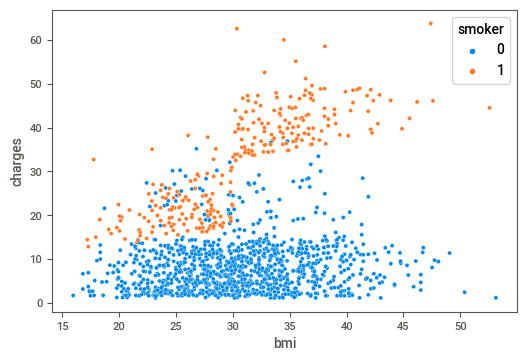

In [187]:
# plota gráfico de dispersão de bmi versus charges, e indica fumantes e não fumantes
# por cores
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

Será que só com a variável 'bmi' é possível prever 'charges'?
Vejamos isso.

# Criando um Modelo de Machine Learning
# Scikit-learn

É uma biblioteca para Machine Learning com ferramentas para análises preditivas de dados.

Construida com base nas biblios NumPy, SciPy a Matplotlib.


https://scikit-learn.org/stable/

In [ ]:
# importa o modelo LinearRegression da sub-blioteca linear_model do scikit learn.
from sklearn.linear_model import LinearRegression

## Modelo para prever **charges** em função de **BMI**

O modelo de regressão linear, para prever custos em função de BMI é dado por:

$$
charges = \beta_0 + \beta \times BMI 
$$

Após importar o modelo LinearRegression do Scikit Learn precisamos fornecer, atribuimos o o modelo a uma variável, criando um objeto do tipo LinearRegression Model.

Este tipo de objeto possui alguns métodos, um deles é o **.fit()** que ajusta o modelo a fim de calcular os valores de $\beta_0$ r $\beta$. O método **fit** precisa receber os seguintes argumentos:

1.   Variável explicativa $x$, que deve sempre ser um DataFrame.
2.   Variável resposta $y$, que pode ser um DF ou uma Series.

Página do sklearn sobre o modelo Linear Regression:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression

In [189]:
X = dados[['bmi']]    # define variável explicativa, que precisa ser um obj DF
y = dados['charges']  # define variável resposta, pode ser DF ou Series

regressão = LinearRegression()   # cria obj regressão
regressão.fit(X, y)              # aplica o método fit ao obj

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
type(regressão)

sklearn.linear_model._base.LinearRegression

Encontrando os valores de $\beta_0$ e $\beta$:

O método **intercept( )** fornece o ponto que a reta intercepta o eixo $y$.



In [191]:
b0 = regressão.intercept_
b0

1.1929372089611512

In [192]:
b = regressão.coef_
b

array([0.39387303])

In [193]:
print('O coeficiente beta_0 é igual a: ', b0)
print('O coeficiente beta é igual a: ', b[0])

O coeficiente beta_0 é igual a:  1.1929372089611512
O coeficiente beta é igual a:  0.3938730307973951


## Aplicando o Modelo de Regressão Linear

Vamos utilizar o modelo para fazer predição de dados novos.

In [184]:
# novos dados a serem utilizados pelo modelo
novos_dados = pd.DataFrame({'bmi': [15, 22, 28]})

# faz predição usando os boos dados
regressão.predict(novos_dados)

array([ 7.10103267,  9.85814389, 12.22138207])

## Criando o gráfico de ajuste

In [194]:
# cria um array com valores gerados para x
pontos_em_x = np.arange(15, 55, 0.1)

#cria um array com valores calculados para y
pontos_em_y = b0 + b*pontos_em_x

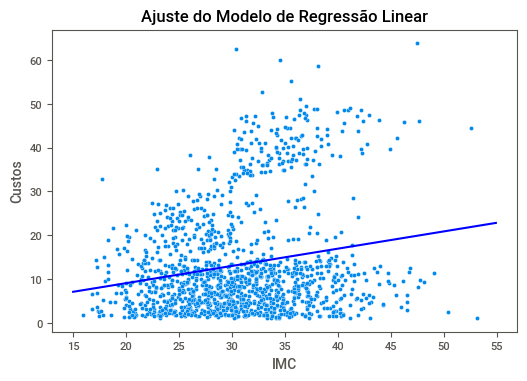

In [195]:
sns.scatterplot(x = 'bmi', y = 'charges', data = dados)

#plota a reta de ajuste
plt.plot(pontos_em_x, pontos_em_y, color = 'blue')
plt.title('Ajuste do Modelo de Regressão Linear')
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.show()

O modelo está feito, contudo não está bem ajustado.
Para decidir se o modelo será colocado em produção, devemos avaliá-lo.

## Métrica para Avaliação de Modelo

### Erro Quadrático Médio

$$
EQM = \frac{1}{n} \sum_{i = 1}^{n} (y_i - \hat{y})^2
$$

Abaixo são mostradas duas formas de se calcular o EQM: escrevendo um código, ou importando a função **mean_squared_error** do módulo **metrics**.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [197]:
preditos = regressão.predict(X)    # usa os próprios dados de treino
eqm1 = ((y - preditos)**2).mean()

from sklearn.metrics import mean_squared_error
eqm2 = mean_squared_error(y, preditos)

print('eqm1 e eqm2 são iguais à {} e {}, respectivamente.'.format(round(eqm1, 2), round(eqm2, 2)))

eqm1 e eqm2 são iguais à 140.78 e 140.78, respectivamente.


Posso considerar que 140.78 é o valor que representa o erro do ajuste?

O EQM serve para comparar entre modelos. 

Neste caso, usamos os próprios dados de treino para calcular o erro.
A capacidade de predição de um modelo é melhor para os dados com o qual ele foi treinado.

## Estratégia de Validação do Modelo

### Técnica do Holdout

Conjunto de Dados é divido **aleatoriamente** em dois conjuntos:

*   Treino - treina o modelo
*   Teste - testa o modelo

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test#sklearn.model_selection.train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

train_test_split(X, y, test_size = 0.25)

[         bmi
 601   31.635
 551   28.930
 57    31.680
 853   23.750
 899   22.515
 ...      ...
 48    24.530
 102   30.115
 669   29.810
 776   32.300
 1050  36.955
 
 [1003 rows x 1 columns],          bmi
 1094  33.700
 226   38.060
 857   24.130
 811   42.940
 937   24.225
 ...      ...
 714   22.600
 38    36.670
 240   36.670
 760   34.580
 725   39.050
 
 [335 rows x 1 columns], 601      9.174136
 551      3.972925
 57      34.303167
 853     11.729679
 899      2.117339
           ...    
 48      12.629897
 102     21.344847
 669      6.500236
 776      6.986697
 1050     8.023135
 Name: charges, Length: 1003, dtype: float64, 1094    11.299343
 226      2.689495
 857     15.817986
 811      6.360994
 937      8.965796
           ...    
 714      2.457502
 38      39.774276
 240     38.511628
 760      3.925758
 725     40.932429
 Name: charges, Length: 335, dtype: float64]

A função acima separa o conjunto em quatro subconjuntos de variáveis:

1.   Explicativa treino
2.   Explicativa teste
3.   Resposta treino
4.   Resposta teste

Atribuindo estes grupos a variáveis, temos:


In [198]:
# Separa os dados em subconjuntos para teste e treinamento
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25)

In [199]:
print(X_treino.describe().round().T)
print()
print(X_teste.describe().round().T)
print()
print(y_treino.describe().round())
print(y_teste.describe().round())


      count  mean  std   min   25%   50%   75%   max
bmi  1003.0  31.0  6.0  17.0  26.0  30.0  35.0  53.0

     count  mean  std   min   25%   50%   75%   max
bmi  335.0  30.0  6.0  16.0  26.0  30.0  34.0  53.0

count    1003.0
mean       13.0
std        12.0
min         1.0
25%         5.0
50%         9.0
75%        15.0
max        64.0
Name: charges, dtype: float64
count    335.0
mean      14.0
std       13.0
min        1.0
25%        5.0
50%       10.0
75%       19.0
max       63.0
Name: charges, dtype: float64


Agora, ajustamos o modelo aos dados de treino.

In [200]:
regressão2 = LinearRegression()
regressão2.fit(X_treino, y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Aplicamos o modelo ao dados de teste, para prever os valores de y:

In [201]:
preditos2 = regressão2.predict(X_teste)

E calculamos o EQM a partir da média do quadrado dos desvios entre os valores de teste e preditos pelo modelo.

In [203]:
from sklearn.metrics import mean_squared_error
eqm2 = mean_squared_error(y_teste, preditos2)

print('EQM2 = {}'.format(round(eqm2, 2)))

EQM2 = 160.69


**IMPORTANTE:** O valor do EQM depende da divisão entre variáveis de treino e de teste realizada pelo algoritmo. O valor irá variar para diferentes holdouts, uma vez que a separação é feita de maneira aleatória. Esta é a beleza da estatística.


In [216]:
lista_eqm2 =[]

for i in range(99):
  X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25)

  regressão2 = LinearRegression()
  regressão2.fit(X_treino, y_treino)

  # aplica o modelo
  preditos2 = regressão2.predict(X_teste)

  # testa o modelo, calculando eqm
  from sklearn.metrics import mean_squared_error
  eqm2 = round(mean_squared_error(y_teste, preditos2), 2)
  
  lista_eqm2.append(eqm2)

vetor_eqm2 = np.array(lista_eqm2)
print(vetor_eqm2 )
print()
print('A média dos EQM é: ', vetor_eqm2.mean())
print('O máximo valor de EQM é: ', vetor_eqm2.max())
print('O mínimo valor de EQM é: ', vetor_eqm2.min())


[142.92 158.47 157.08 153.26 130.12 134.23 125.9  131.88 153.75 135.47
 141.73 136.37 129.59 132.23 146.3  136.6  133.58 145.78 162.95 148.55
 131.06 157.89 148.16 118.02 125.42 132.4  119.18 150.28 134.53 121.61
 132.39 129.43 156.93 150.16 161.28 126.59 127.06 144.9  151.26 123.82
 139.59 120.77 132.35 153.14 140.89 112.3  137.11 139.83 146.15 149.12
 120.42 157.01 139.48 134.61 139.33 137.7  124.59 133.   125.74 123.68
 134.89 143.31 144.18 137.73 148.45 139.3  149.76 139.21 147.88 148.53
 143.   122.83 123.86 135.33 140.23 147.85 130.16 136.07 139.63 126.16
 134.43 140.57 158.12 128.26 150.68 136.57 137.3  132.64 140.17 138.8
 135.08 150.99 126.84 127.32 132.13 143.86 142.9  138.09 152.1 ]

A média dos EQM é:  138.49646464646466
O máximo valor de EQM é:  162.95
O mínimo valor de EQM é:  112.3


### Considerações

O método Holdout produz resultados com variabilidade, por consequência, há incerteza sobre o valor do EQM do modelo.

Como resolver esta questão?

## Alimentando o Modelo com mais Informações

### Considerando o Modelo com DUAS variáveis preditoras:

$$
charges = \beta_0 + \beta_1 \times BMI + \beta_2 \times Smoker
$$

In [217]:
X = dados[['bmi', 'smoker']]
y = dados['charges'] 

In [220]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25)

regressão3 = LinearRegression()
regressão3.fit(X_treino, y_treino)

preditos3 = regressão3.predict(X_teste)

from sklearn.metrics import mean_squared_error
eqm3 = round(mean_squared_error(y_teste, preditos3), 2)

print('EQM_3 é igual a:', round(eqm3, 2) )
  

EQM_3 é igual a: 45.45


In [228]:
lista_eqm3 =[]

for i in range(99):
  X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25)

  regressão3 = LinearRegression()
  regressão3.fit(X_treino, y_treino)

  preditos3 = regressão3.predict(X_teste)

  from sklearn.metrics import mean_squared_error
  eqm3 = round(mean_squared_error(y_teste, preditos3), 2)
  
  lista_eqm3.append(eqm3)

vetor_eqm3 = np.array(lista_eqm3)
print(vetor_eqm3)
print()
print('A média dos EQM é: ', vetor_eqm3.mean())
print('O máximo valor de EQM é: ', vetor_eqm3.max())
print('O mínimo valor de EQM é: ', vetor_eqm3.min())


[54.   57.09 52.56 48.79 48.57 51.37 52.5  52.53 53.33 49.81 55.86 51.7
 51.57 46.76 48.04 50.67 52.61 55.78 48.47 48.65 45.98 55.88 46.3  58.08
 54.85 49.52 53.46 45.93 46.75 49.63 57.74 47.82 45.04 49.09 49.23 51.61
 56.45 52.52 56.82 48.88 45.52 57.46 53.46 53.15 52.88 48.77 60.17 49.68
 47.13 53.26 52.38 46.56 49.05 53.36 50.02 42.65 50.22 55.79 49.73 51.05
 47.88 57.44 49.21 52.59 52.1  51.57 46.92 54.2  44.94 49.6  51.14 50.43
 44.21 55.33 58.04 56.6  43.44 48.62 48.4  52.77 48.36 48.92 60.55 57.31
 51.02 56.71 50.52 55.93 53.79 52.78 64.24 47.36 59.02 51.78 47.95 51.01
 47.55 45.16 53.56]

A média dos EQM é:  51.44929292929292
O máximo valor de EQM é:  64.24
O mínimo valor de EQM é:  42.65


Neste caso, os modelos resultam em Erros significativamente diferentes, portanto é possível conclir que o modelo com duas variáveis explicativa é melhor que aquele que considera apenas uma variável explicativa.

Porém, quando os resultados do EQM estão próximos, a inceteza inerente ao método Holdout não permite concluir que um modelo tenha desempenho superior ao outro.

In [229]:
b0 = regressão3.intercept_
b= regressão3.coef_
print('O coeficiente beta_0 é igual a: ', b0)
print('O coeficiente beta_1 é igual a: ', b[0])
print('O coeficiente beta_2 é igual a: ', b[1])

O coeficiente beta_0 é igual a:  -3.18295285069002
O coeficiente beta_1 é igual a:  0.3853014993566533
O coeficiente beta_2 é igual a:  23.183047161324822


### Gráfico de Ajuste com DUAS Variáveis

X1 (BMI) pode variar de 15 a 55;

X2 (Smoker) é 0 ou 1.


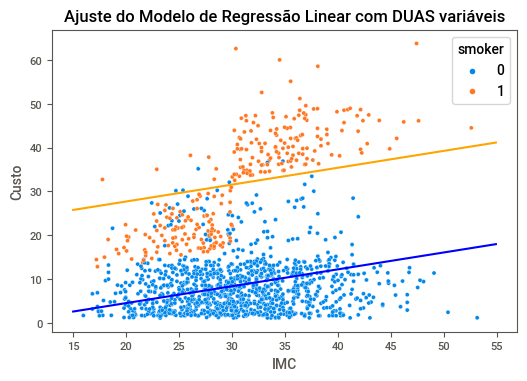

In [230]:
x = np.arange(15, 55, 0.1)

y0 = b0 + b[0]*x + b[0]*0
y1 = b0 + b[0]*x + b[1]*1

sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = dados)

plt.plot(x, y0, color = 'blue')
plt.plot(x, y1, color = 'orange')
plt.title('Ajuste do Modelo de Regressão Linear com DUAS variáveis')
plt.xlabel('IMC')
plt.ylabel('Custo')
plt.show()

## Calculando o R2_score

O R2_score, bem como demais métricas de Regressão Linear serão vistos posteriormente ao longo do curso.

In [233]:
from sklearn.metrics import r2_score
r2 = r2_score(y_teste, preditos3)
r2

0.6713231387031966

# ML versus Estatística Tradicional

Ao fazer um modelo estatístico tradicional, precisamos atender aos pressupostos e hipóteses do modelo. Ex.: Para Regressão Linear: dados normais, erros com média zero, etc. Se as hipóteses forem atendidas, o modelos será bom.

Contudo, em Machine Learning, o importante é a capacidade de predição do modelo.

**Em ML, os pressupostos do modelo não são importantes, o que é importante é o quanto o modelo consegue de performance em dados não utilizados no treinamento.**

Em outra palavras:

**O modelo é tão bom quanto sua capcidade de fazer predições.**